In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import matplotlib.pyplot as plt 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import seaborn as sns
import os
import warnings
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/final-data/final-2.csv


In [2]:
df = pd.read_csv("/kaggle/input/final-data/final-2.csv")
df.drop(columns = ['Unnamed: 0.2', 'Unnamed: 0.1', 'SECCODE', 'Unnamed: 0', 'NO',"ORDERNO"], inplace = True)

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

# Group by 'Date' and calculate the average price for each date
average_prices = df.groupby('Date')['TRADEPRICE'].mean().reset_index()
fig = px.line(average_prices, x='Date', y='TRADEPRICE', title='Average Price by Date SBER')
fig.show()

In [4]:
fig = px.scatter(df, x='TIME', y='TRADEPRICE', color='BUYSELL', 
                 title='Limit Order Book',
                 labels={'TRADEPRICE': 'Trade Price', 'TIME': 'Time', 'BUYSELL': 'Buy/Sell'})
fig.show()

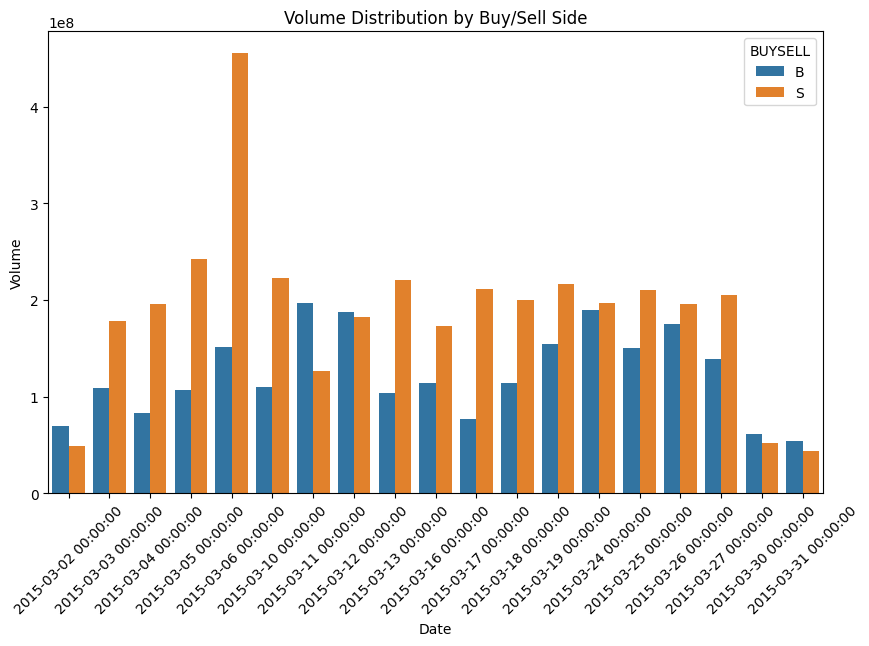

In [5]:
volume_by_date_side = df.groupby(['Date', 'BUYSELL'])['VOLUME'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=volume_by_date_side, x='Date', y='VOLUME', hue='BUYSELL')
plt.title('Volume Distribution by Buy/Sell Side')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.show()

In [6]:
# Group by 'Date' and 'BUYSELL', and calculate the total volume for each group
volume_by_date_side = df.groupby(['Date', 'BUYSELL'])['VOLUME'].sum().reset_index()
fig = px.bar(volume_by_date_side, x='Date', y='VOLUME', color='BUYSELL',
             title='Volume Distribution by Buy/Sell Side',
             labels={'VOLUME': 'Volume', 'Date': 'Date', 'BUYSELL': 'Buy/Sell'})
fig.update_layout(xaxis=dict(tickangle=45))
fig.show()


In [7]:
# Filter the DataFrame to include only rows where trades have occurred
df_filtered = df.dropna(subset=['TRADENO', 'TRADEPRICE', 'TRADE_PRICE', 'TRADE_VOLUME', 'TRADE_TIME'])
volume_by_date_side = df_filtered.groupby(['Date', 'BUYSELL'])['TRADE_VOLUME'].sum().reset_index()
fig = px.bar(volume_by_date_side, x='Date', y='TRADE_VOLUME', color='BUYSELL',
             title='Volume Distribution by Buy/Sell Side (Trades Only)',
             labels={'TRADE_VOLUME': 'Volume', 'Date': 'Date', 'BUYSELL': 'Buy/Sell'})
fig.update_layout(xaxis=dict(tickangle=45))
fig.show()

In [8]:
# Filter the DataFrame to include only rows where trades have occurred
df_filtered = df.dropna(subset=['TRADENO', 'TRADEPRICE', 'TRADE_PRICE', 'TRADE_VOLUME', 'TRADE_TIME'])
# Group by 'Date' and 'BUYSELL', and calculate the total volume for each group
volume_by_date_side = df_filtered.groupby(['Date', 'BUYSELL'])['TRADE_VOLUME'].sum().reset_index()
fig = px.bar(volume_by_date_side, x='Date', y='TRADE_VOLUME', color='BUYSELL', barmode='group',
             title='Volume Distribution by Buy/Sell Side (Trades Only)',
             labels={'TRADE_VOLUME': 'Volume', 'Date': 'Date', 'BUYSELL': 'Buy/Sell'})
fig.update_layout(xaxis=dict(tickangle=45))
fig.show()


In [9]:
# Filter the DataFrame to include only rows where trades have occurred
df_filtered = df.dropna(subset=['TRADENO', 'TRADEPRICE', 'TRADE_PRICE', 'TRADE_VOLUME', 'TRADE_TIME'])
volume_by_date_action = df_filtered.groupby(['Date', 'ACTION'])['TRADE_VOLUME'].sum().reset_index()
fig = px.bar(volume_by_date_action, x='Date', y='TRADE_VOLUME', color='ACTION', barmode='group',
             title='Volume Distribution by Action (Trades Only)',
             labels={'TRADE_VOLUME': 'Volume', 'Date': 'Date', 'ACTION': 'Action'})
fig.update_layout(xaxis=dict(tickangle=45))
fig.show()


In [10]:
# Group by 'Date' and 'ACTION', and calculate the total volume for each group
volume_by_date_action = df.groupby(['Date', 'ACTION'])['TRADE_VOLUME'].sum().reset_index()
fig = px.bar(volume_by_date_action, x='Date', y='TRADE_VOLUME', color='ACTION', barmode='group',
             title='Volume Distribution by Action',
             labels={'TRADE_VOLUME': 'Volume', 'Date': 'Date', 'ACTION': 'Action'})
fig.update_layout(xaxis=dict(tickangle=45))
fig.show()


In [11]:
#Group by 'Date' and 'ACTION', and calculate the total volume for each group
volume_by_date_action = df.groupby(['Date', 'ACTION']).size().reset_index(name='Count')
fig = px.bar(volume_by_date_action, x='Date', y='Count', color='ACTION', barmode='group',
             title='Distribution of Actions by Date',
             labels={'Count': 'Number of Observations', 'Date': 'Date', 'ACTION': 'Action'})
fig.update_layout(xaxis=dict(tickangle=45))
fig.show()

In [12]:
# Group by 'Date', 'ACTION', and 'BUYSELL', and calculate the total volume for each group
volume_by_date_action = df.groupby(['Date', 'ACTION', 'BUYSELL']).size().reset_index(name='Count')
fig = px.bar(volume_by_date_action, x='Date', y='Count', color='ACTION', barmode='group', facet_col='BUYSELL',
             title='Distribution of Actions by Date and Buy/Sell',
             labels={'Count': 'Number of Observations', 'Date': 'Date', 'ACTION': 'Action', 'BUYSELL': 'Buy/Sell'})
fig.update_layout(xaxis=dict(tickangle=45))
fig.show()
